#  Task: Price Range vs. Online Delivery and Table Booking

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

<Figure size 1000x600 with 0 Axes>

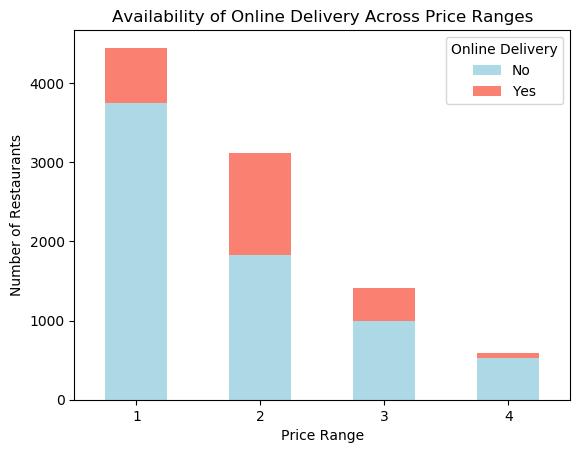

<Figure size 1000x600 with 0 Axes>

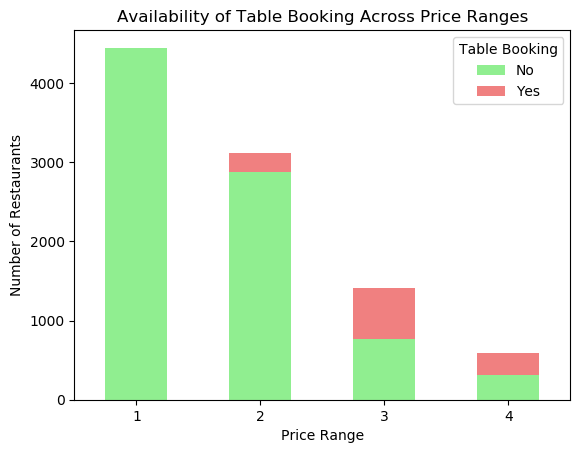

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset.csv")

df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])

price_range_delivery = df.groupby('Price range')['Has Online delivery'].value_counts().unstack()
price_range_table_booking = df.groupby('Price range')['Has Table booking'].value_counts().unstack()

plt.figure(figsize=(10, 6))
price_range_delivery.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title("Availability of Online Delivery Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.legend(title="Online Delivery", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(10, 6))
price_range_table_booking.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title("Availability of Table Booking Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.legend(title="Table Booking", labels=["No", "Yes"])
plt.show()


### Determine if higher-priced restaurants are more likely to offer these services.


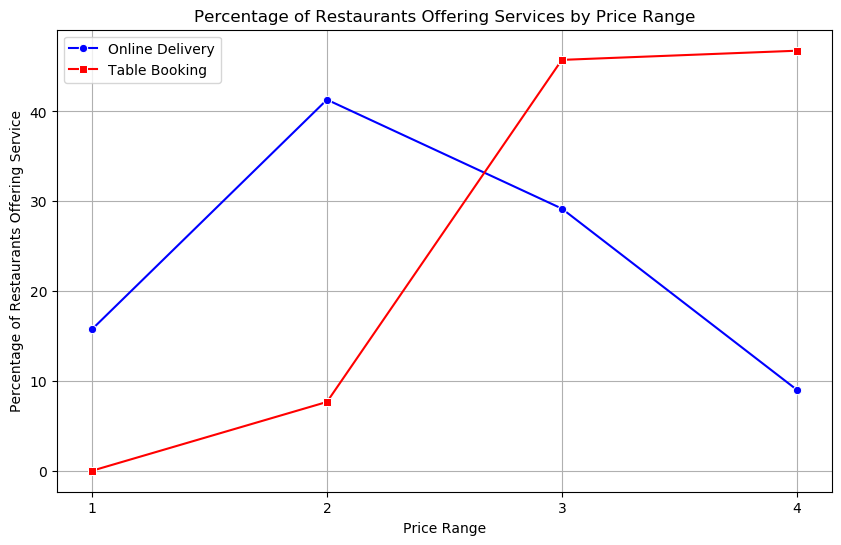

In [2]:
df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])

# Convert categorical values to numerical (Yes -> 1, No -> 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the proportion of restaurants offering these services per price range
price_delivery_ratio = df.groupby('Price range')['Has Online delivery'].mean() * 100
price_table_booking_ratio = df.groupby('Price range')['Has Table booking'].mean() * 100

# Create a DataFrame for visualization
services_df = pd.DataFrame({
    'Online Delivery': price_delivery_ratio,
    'Table Booking': price_table_booking_ratio
}).reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=services_df, x="Price range", y="Online Delivery", marker='o', label="Online Delivery", color="blue")
sns.lineplot(data=services_df, x="Price range", y="Table Booking", marker='s', label="Table Booking", color="red")

plt.title("Percentage of Restaurants Offering Services by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Service")
plt.xticks(services_df["Price range"])
plt.legend()
plt.grid()
plt.show()